# Your name: 
Sameer Khurana (skhurana)

# Assigned reading:
Chapters 1-3 of textbook

# Part 1: MNIST: PyTorch

To get you started we have provided a "deep" network in this notebook. Run the ipython
notebook as you go along and answer the questions. Most questions below have a *small* coding component (you only need to edit code when specifically asked to).

## Import libraries and dataset

In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time, os
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
%matplotlib inline

num_epochs = 10

Import the MNIST dataset

In [4]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

num_train = len(trainset)
indices = list(range(num_train))
split = 10000

# shuffle data
np.random.seed(6825)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, sampler=train_sampler, shuffle=False)

validloader = torch.utils.data.DataLoader(trainset, batch_size=50, sampler=valid_sampler, shuffle=False)

testloader = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False)

In [8]:
# DELETE THIS

for ex in trainloader:
    print(ex[0].shape)
    break

torch.Size([50, 1, 28, 28])


## Set up the network

Network description

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 5, padding = 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 8, 5, padding = 2)
        self.fc1 = nn.Linear(8 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 8 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

## Network Analysis
### Question 1.

Read the code above and determine the type of each of the layers (convolutional, fully-connected, ReLU, or pooling) and then answer the following questions by updating the cell below:

1. How many layers deep is the network and what is the type of each layer (count nonlinear activations as their own layer, but do not count flattening)?
 
2. What is the size of the network input? Your answer should be a 4-D tuple `(batch_size, width, height, channels)`
3. Describe the parameters used in each layer:
    1. Convolutional layers: Specify a 4-tuple `(weight_width, weight_height, channels, filter_count)`
    2. Fully connected layers: Specify a 2-tuple `(num_output_nodes, num_input_nodes)`
    3. Pool layer: Specify `(x_window, y_window, x_stride, y_stride)`
    4. ReLU: Specify `None`

In [17]:
# update
num_layers = 9

layer_type = ['conv', 'relu', 'pool', 'conv', 'relu', 'pool', 'fc', 'relu', 'fc']

network_input_sz = (50, 28, 28, 1)

conv1_param = (5, 5, 1, 4)

conv2_param = (5, 5, 4, 8)

fc1_param = (256, 392)

fc2_param = (10, 256)

pool_layer = (2, 2, 2, 2)

relu = None

layer_param = [
    conv1_param,
    None,
    pool_layer,
    conv2_param,
    None,
    pool_layer,
    fc1_param,
    None,
    fc2_param,
]
print("Layer Types: ", layer_type)
print("Layer Param: ", layer_param)

Layer Types:  ['conv', 'relu', 'pool', 'conv', 'relu', 'pool', 'fc', 'relu', 'fc']
Layer Param:  [(5, 5, 1, 4), None, (2, 2, 2, 2), (5, 5, 4, 8), None, (2, 2, 2, 2), (256, 392), None, (10, 256)]


### Question 2.

One way of finding the layer input sizes is simply by inspection. Since the inputs of a subsequent layer are the outputs of a previous layer, we can also compute the size of these outputs based on the inputs sizes and weight parameters. Complete the `get_output_size` function to do this.

In [21]:
import math

def get_output_size(input_sz, layer_type, layer_param):
    
    # Input shape: (N, W, H, C)
    
    batch_size = input_sz[0]
    
    if len(input_sz) == 4:

        width_in = input_sz[1]

        height_in = input_sz[2]

        channels = input_sz[3]

    if layer_type == 'conv':
        # Your code here
        weight_width, weight_height, channels, filter_count = layer_param
        
        padding = 2.
        
        stride = 1.
        
        height = 1.+((height_in + 2*padding - (weight_height-1)-1) / stride)
        height = math.floor(height)
        
        width = 1.+((width_in + 2*padding - (weight_width-1)-1) / stride)
        width = math.floor(width)
        
        # Return format: (batch_size, width, height, channels)
        return (batch_size, width, height, filter_count)
    
    elif layer_type == 'pool':
        
        # Your code here
        
        padding = 0
        
        (x_window, y_window, x_stride, y_stride) = layer_param
        
        height = 1.+((height_in + 2*padding - (y_window-1)-1) / y_stride)
        height = math.floor(height)
        
        width = 1.+((width_in + 2*padding - (x_window-1)-1) / x_stride)
        width = math.floor(width)
        
        # Return format: (batch_size, width, height, channels)
        
        return (batch_size, width, height, channels)
    
    elif layer_type == 'fc':
        
        # Your code here
        
        (num_output_nodes, num_input_nodes) = layer_param
        
        # Return format: (batch_size, num_outputs)
        
        return (batch_size, num_output_nodes)
    
    elif layer_type == 'relu':
        
        # Your code here
        
        # Return format: Input-dependent tuple 
        
        return input_sz

layer_sz = []
print("Input  : ", network_input_sz)
for n in range(num_layers):
    if n == 0:
        layer_sz.append(get_output_size(network_input_sz, layer_type[n], layer_param[n]))
    else:
        layer_sz.append(get_output_size(layer_sz[n-1], layer_type[n], layer_param[n]))
    print("Layer %d: " % (n+1), layer_sz[n])

Input  :  (50, 28, 28, 1)
Layer 1:  (50, 28, 28, 4)
Layer 2:  (50, 28, 28, 4)
Layer 3:  (50, 14, 14, 4)
Layer 4:  (50, 14, 14, 8)
Layer 5:  (50, 14, 14, 8)
Layer 6:  (50, 7, 7, 8)
Layer 7:  (50, 256)
Layer 8:  (50, 256)
Layer 9:  (50, 10)


In [31]:
for p in net.named_parameters():
    params = np.prod(p[1].size())
    print(p[0], params)

conv1.weight 100
conv1.bias 4
conv2.weight 800
conv2.bias 8
fc1.weight 100352
fc1.bias 256
fc2.weight 2560
fc2.bias 10


### Question 3.

Next, complete the `num_params` and `param_memory_size` functions to calculate the number of weights (i.e. parameters, including biases) required in each layer and the memory required for storing the weights (including biases) respectively. Assume weight is stored in single precision floating point format.

In [33]:
def num_params(layer_type, layer_param):
    if layer_type == 'conv':
        
        # Your code here
        
        weight_width, weight_height, channels, filter_count = layer_param
        
        # +1 for bias
        total_params = ((weight_width * weight_height * channels)+1)*filter_count
        
        # Return format: (number_of_params)
        
        return total_params
    
    elif layer_type == 'pool':
        
        # Your code here
        
        total_params = 0
        
        # Return format: (number_of_params)
        
        return total_params
    
    elif layer_type == 'fc':
        
        # Your code here
        
        (num_output_nodes, num_input_nodes) = layer_param
        
        # +num_output_nodes for bias
        total_params = (num_output_nodes * num_input_nodes) + num_output_nodes
        
        # Return format: (number_of_params)
        
        return total_params
    
    elif layer_type == 'relu':
        
        # Your code here
        
        total_params = 0
        
        # Return format: (number_of_params)
        
        return total_params

# Required memory in bytes
def param_memory_size(layer_type, layer_param):
    
    # Your code here
    
    params = num_params(layer_type, layer_param)
    
    bit_storage = params * 32.
    
    mem = bit_storage * 0.125
    
    # Return format: (mem_size_for_params)
    
    return mem

layer_params_mem = []
for n in range(num_layers):
    layer_params_mem.append(param_memory_size(layer_type[n], layer_param[n]))
    print("Layer %d: " % (n+1), layer_params_mem[n])

Layer 1:  416.0
Layer 2:  0.0
Layer 3:  0.0
Layer 4:  3232.0
Layer 5:  0.0
Layer 6:  0.0
Layer 7:  402432.0
Layer 8:  0.0
Layer 9:  10280.0


### Question 4.

Determine the number of multiplications required per _batch_. Multiplications by zero should still be counted.

In [35]:
def num_mult(input_sz, layer_type, layer_param):
    if layer_type == 'conv':
        # Your code here
        
        weight_width, weight_height, channels_in, filter_count = layer_param
        
        (batch_size, width_out, height_out, channels_out) = get_output_size(input_sz, layer_type, layer_param)
        
        num_mult = (weight_width * weight_height * channels_in) * width_out * height_out * channels_out * batch_size
        
        # Return format: (number_of_mult)
        
        return num_mult
    elif layer_type == 'pool':
        
        # Your code here
        
        # Return format: (number_of_mult)
        
        return 0
    elif layer_type == 'fc':
        
        # Your code here
        
        batch_size = input_sz[0]
        
        (num_output_nodes, num_input_nodes) = layer_param
        
        num_mult = batch_size * num_output_nodes * num_input_nodes
        
        # Return format: (number_of_mult)
        
        return num_mult
    elif layer_type == 'relu':
        
        # Your code here
        
        
        # Return format: (number_of_mult)
        
        return 0

layer_mult_count = []
for n in range(num_layers):
    if n == 0:
        layer_mult_count.append(num_mult(network_input_sz, layer_type[n], layer_param[n]))
    else:
        layer_mult_count.append(num_mult(layer_sz[n-1], layer_type[n], layer_param[n]))
    print("Layer %d: " % (n+1), layer_mult_count[n])

Layer 1:  3920000
Layer 2:  0
Layer 3:  0
Layer 4:  7840000
Layer 5:  0
Layer 6:  0
Layer 7:  5017600
Layer 8:  0
Layer 9:  128000


### Network Summary

Run this cell to summarize your results

In [36]:
print("Network Summary:")
print("Layer\tType\tInput Size\tWeight Param\tOutput Size\tWeight Memory\t#mult")
for layer_idx in range(num_layers):
    print("%d\t%s\t%s\t%s\t%s\t%s\t%s" % (
            (layer_idx+1),
            layer_type[layer_idx], 
            str(network_input_sz if layer_idx == 0 else layer_sz[layer_idx-1]).ljust(12), 
            str(layer_param[layer_idx]).ljust(12), 
            str(layer_sz[layer_idx]).ljust(12), 
            str(layer_params_mem[layer_idx]).ljust(12),
            str(layer_mult_count[layer_idx]).ljust(12)
        ))

Network Summary:
Layer	Type	Input Size	Weight Param	Output Size	Weight Memory	#mult
1	conv	(50, 28, 28, 1)	(5, 5, 1, 4)	(50, 28, 28, 4)	416.0       	3920000     
2	relu	(50, 28, 28, 4)	None        	(50, 28, 28, 4)	0.0         	0           
3	pool	(50, 28, 28, 4)	(2, 2, 2, 2)	(50, 14, 14, 4)	0.0         	0           
4	conv	(50, 14, 14, 4)	(5, 5, 4, 8)	(50, 14, 14, 8)	3232.0      	7840000     
5	relu	(50, 14, 14, 8)	None        	(50, 14, 14, 8)	0.0         	0           
6	pool	(50, 14, 14, 8)	(2, 2, 2, 2)	(50, 7, 7, 8)	0.0         	0           
7	fc	(50, 7, 7, 8)	(256, 392)  	(50, 256)   	402432.0    	5017600     
8	relu	(50, 256)   	None        	(50, 256)   	0.0         	0           
9	fc	(50, 256)   	(10, 256)   	(50, 10)    	10280.0     	128000      


## Training the network

The code below trains for `num_epochs` number of epochs and plots the training error. If you want (not graded), you can update this function to calculate the validation accuracy after each epoch so that you can plot it later. You can then play around with the number of epochs to see how it affects the validation accuracy (also not graded).

Note: The initialization below is not strictly necessary, as PyTorch will automoatically initialize the weights (including biases) for you. We've included initialization here so that if you run the cell more than once, you will start fresh.

In [37]:
training_acc_vect = np.zeros(num_epochs)
valid_acc_vect = np.zeros(num_epochs)

start_time = time.time()

# initialize weights and biases
nn.init.kaiming_uniform_(net.conv1.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.conv1.bias.size(0))
nn.init.uniform_(net.conv1.bias, -stdv, stdv)
nn.init.kaiming_uniform_(net.conv2.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.conv2.bias.size(0))
nn.init.uniform_(net.conv2.bias, -stdv, stdv)
nn.init.kaiming_uniform_(net.fc1.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.fc1.bias.size(0))
nn.init.uniform_(net.fc1.bias, -stdv, stdv)
nn.init.kaiming_uniform_(net.fc2.weight, nonlinearity = 'relu')
stdv = 1./np.sqrt(net.fc2.bias.size(0))
nn.init.uniform_(net.fc2.bias, -stdv, stdv)

# train network
for epoch in range(num_epochs):  # loop over the dataset multiple times while training
    correct_train = 0
    total_train = 0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data # list of [inputs, labels]
        #print(labels.shape)
        optimizer.zero_grad() # clear gradients
        outputs = net(inputs) # forward step
        loss = criterion(outputs, labels)
        loss.backward() # backprop
        optimizer.step() # optimize weights

        # print statistics
        duration = time.time() - start_time
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    training_acc = correct_train / total_train * 100
    training_acc_vect[epoch] = training_acc
    
    print('Accuracy of the network on the 50000 training images after epoch %d: %.2f %% (%.1f sec)' % (
        epoch + 1, training_acc, duration))
    
    # your code here to calculate the validation error after each epoch
    
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    val_acc = correct / total * 100
    print('Accuracy of the network on the validation images after epoch %d: %.2f %% (%.1f sec)' % (
        epoch + 1, val_acc, duration))
    
    
print('Finished Training')

Accuracy of the network on the 50000 training images after epoch 1: 80.66 % (626.3 sec)
Accuracy of the network on the validation images after epoch 1: 91.96 % (626.3 sec)
Accuracy of the network on the 50000 training images after epoch 2: 92.94 % (1470.0 sec)
Accuracy of the network on the validation images after epoch 2: 94.25 % (1470.0 sec)
Accuracy of the network on the 50000 training images after epoch 3: 94.74 % (2338.3 sec)
Accuracy of the network on the validation images after epoch 3: 95.62 % (2338.3 sec)


KeyboardInterrupt: 

Final Training Accuracy: 94.738


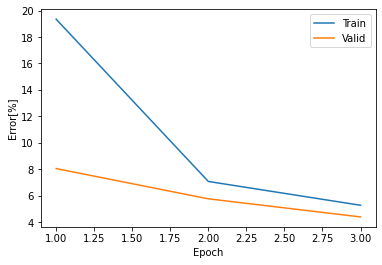

In [61]:
epoch_vect = np.linspace(1, 3, 3)

plt.figure(1)
train_line, = plt.plot(epoch_vect, 100-training_acc_vect[:3])

print("Final Training Accuracy: %g" % (training_acc))

# Your code here to plot validation error
val_accs = np.array([91.96, 94.25, 95.62])
valid_line, = plt.plot(epoch_vect, 100-val_accs)
plt.xlabel('Epoch')
plt.ylabel('Error[%]')
plt.legend([train_line, valid_line], ["Train", "Valid"])
plt.show()

### Question 5.

(Theory question, no coding component.) You have trained a classifier to recognize handwritten digits with a training set of black digits on a white background. You then give it test images with white digits on a black background, however, it doesn't seem to perform the classification correctly. Please list the principles that could explain why it doesn't work.


This is the problem of domain mismatch between the training and testing conditions. During training the model used black pixel values to detect the digit. In the process the model must learn to ignore a lot of white pixels and concentrate only on black pixels to predict the digit. Hence, during testing the model does not do well with white digits on black pixels.



## Exporting and loading the model, performing inference

The following 2 lines save the model to the location specified by PATH.

In [62]:
PATH = './my_mnist_net.pth'
torch.save(net.state_dict(), PATH)

### Question 6.

Run inference *using the saved model* and print the training, validation and test accuracies

In [69]:
import tqdm
loaded_net = Net()

def eval_model(PATH, trainloader, validloader, testloader):
    
    state_dict = torch.load(PATH)
    loaded_net.load_state_dict(state_dict)
    
    # your code here
    training_accuracy = 0
    validation_accuracy = 0
    test_accuracy = 0
    
    def get_accuracy(data_loader):
        acc = 0
        tot = 0
        corr = 0
        for i, data in enumerate(tqdm.tqdm(data_loader, total=len(data_loader))):
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            tot += labels.size(0)
            corr += (predicted == labels).sum().item()
        
        acc = corr / tot * 100
        return acc
    
    training_accuracy = get_accuracy(trainloader)
    validation_accuracy = get_accuracy(validloader)
    test_accuracy = get_accuracy(testloader)
        
    return training_accuracy, validation_accuracy, test_accuracy

training_accuracy, validation_accuracy, test_accuracy = eval_model(PATH, trainloader, validloader, testloader)
print('Training Accuracy: %g' % training_accuracy)        
print('Validation Accuracy: %g' % validation_accuracy)
print('Test Accuracy: %g' % test_accuracy)

100%|██████████| 200/200 [00:43<00:00,  4.57it/s]

Training Accuracy: 96.092
Validation Accuracy: 95.2
Test Accuracy: 96.15


### Question 7.

Edit the code below to save the weights and biases for the convolutional and fully-connected layers only. They should be saved as numpy arrays into a dictionary.

In [90]:
model_parameters = {}

# Your code here

layer_ids = [i for i, x in enumerate(layer_type) if x == 'conv' or x == 'fc']

idx = 0
for layer in net.children():
    if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
        weight = layer.weight
        bias = layer.bias
        layer_id = layer_ids[idx] 
        model_parameters['l' + str(layer_id) + '_w'] = weight.detach().numpy()
        model_parameters['l' + str(layer_id) + '_b'] = bias.detach().numpy()
        idx += 1

np.save('my_model_parameters.npy', model_parameters, allow_pickle=True)

### Question 8.
We will evaluate the inference-time energy and latency of the neural network we trained above on the model of a custom acclerator design. The profiler uses the [timeloop/accelergy](http://accelergy.mit.edu/tutorial.html) commands, which we will cover more in-depth in the later part of this course, on the convolution/fully-connected layers in the neural network to obtain the energy estimates. This part may take several minutes to run.

In [91]:
!accelergyTables

In [92]:
from profiler import Profiler
profiler = Profiler(
    top_dir='workloads',
    sub_dir='mnist',
    timeloop_dir='simple_weight_stationary',
    model=net,
    input_size=(1, 28, 28),
    batch_size=1,
    convert_fc=True,
    exception_module_names=[]
)

results = profiler.profile()

total_energy = 0
total_cycle = 0

for layer_id, info in results.items():
    print(f"ID: {layer_id} \t Energy: {info['energy']} \t Cycle: {info['cycle']} \t Number of same architecture layers: {info['num']}")
    total_energy += info['energy'] * info['num']
    total_cycle += info['cycle'] * info['num']
    
print(f'\nTotal Energy: {total_energy} pj \nTotal Cycles: {total_cycle}')

converting nn.Conv2d and nn.Linear in mnist model ...
workload file --> /home/workspace/lab1/workloads/mnist/mnist_layer1.yaml
workload file --> /home/workspace/lab1/workloads/mnist/mnist_layer2.yaml
workload file --> /home/workspace/lab1/workloads/mnist/mnist_layer3.yaml
workload file --> /home/workspace/lab1/workloads/mnist/mnist_layer4.yaml
conversion complete!

running timeloop to get energy and latency...


100%|██████████| 4/4 [07:08<00:00, 107.14s/it]

timeloop running finished!
ID: 1 	 Energy: 1683439.4 	 Cycle: 19600 	 Number of same architecture layers: 1
ID: 2 	 Energy: 2368815.15 	 Cycle: 4900 	 Number of same architecture layers: 1
ID: 3 	 Energy: 14177701.54 	 Cycle: 448 	 Number of same architecture layers: 1
ID: 4 	 Energy: 390710.34 	 Cycle: 16 	 Number of same architecture layers: 1

Total Energy: 18620666.43 pj 
Total Cycles: 24964


Report the total energy and cycles below:

Energy:


18620666.43 pj



Cycles:

24964


